In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re

df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",names=["target", "ids", "date", "flag", "user", "text"])
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Visualizing Our Data

In [6]:
tweets_ALL = " ".join(tweet for tweet in df["text"])
tweets_POS = " ".join(tweet for tweet in df[df["target"] == 0]["text"])
tweets_NEG = " ".join(tweet for tweet in df[df["target"] == 0]["text"])

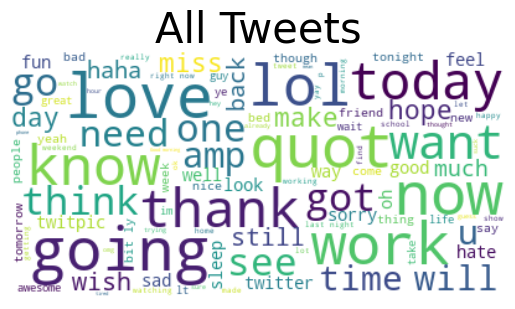

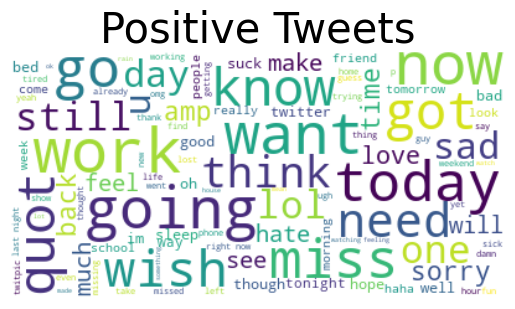

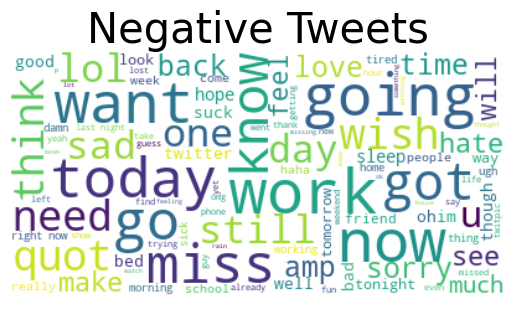

In [8]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets_ALL)
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('All Tweets', fontsize=30)
plt.axis('off')
plt.show()
wordcloud_POS = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets_POS)
plt.imshow(wordcloud_POS, interpolation='bilinear')
plt.title('Positive Tweets', fontsize=30)
plt.axis('off')
plt.show()
wordcloud_NEG = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets_NEG)
plt.imshow(wordcloud_NEG, interpolation='bilinear')
plt.title('Negative Tweets', fontsize=30)
plt.axis('off')
plt.show()

## Can you 🫵 create this for negative and positive tweets

You might need to install wordcloud

```console
pip install wordcloud
```

## Cleaning 🧹



* Remove Handles and Links (hint: regular expressions)
* LowerCase
* Remove Puctuation
* Tokenization
* Removing Stop Words
* Lemonization 
* Stemming
* Part of Speach / Postion Tagging (optional)
* spell check (optional)
* removing repeated charectors

In [9]:
import re
def remove_handles (text):
  return re.sub("@[^\s]+", "", text)
remove_handles ("@elon I hate @twitter")

' I hate '

In [10]:
def remove_link(text):
  return re.sub(r'http\S+', '', text)
remove_link("https://twitpic.com/2y1zl hello ")

' hello '

In [11]:
def lower_case(text):
  return text.lower()
lower_case("HFDKJLDdfdf")

'hfdkjlddfdf'

In [12]:
def remove_chars(text):
  text  = "".join([char for char in text if char not in string.punctuation]) #do we want to replace with space?
  text = re.sub('[0-9]+', '', text)
  return text
remove_chars("hello.56902,324032,24/234\'")

'hello'

In [13]:
def tokenize(text):
    text = re.split('\W+', text)
    return text

tokens = tokenize("we are the champions  ")
tokens

['we', 'are', 'the', 'champions', '']

In [14]:
def remove_stop_words(words): #works on tokenized data
  stopword = nltk.corpus.stopwords.words('english')
  stopword.append("")
  return [word for word in words if word not in stopword]
tokens = remove_stop_words(tokens)
tokens

['champions']

In [15]:
def stemming(text):
  ps = nltk.PorterStemmer()
  text = [ps.stem(word) for word in text]
  return text
stemming(tokens)

['champion']

In [16]:
def clean_and_tokenize(text):
  text = remove_handles(text)
  text = remove_link(text)
  text = lower_case(text)
  text = remove_chars(text)
  text = tokenize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text


## Applying this to our data 😎

In [17]:
pos100 = df[:100]
neg100 = df[df["target"] == 4][:100]
smaller_data = pd.concat([pos100,neg100])
smaller_data.reset_index(inplace=True)
smaller_data = smaller_data.drop(["ids","date", "flag", "user","index"], axis=1)

In [19]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

smaller_data["cleaned"] = smaller_data["text"].apply(clean_and_tokenize)
smaller_data

,target,text,cleaned
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D","[awww, that, bummer, shoulda, got, david, carr, third, day]"
1,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,"[upset, cant, updat, facebook, text, might, cri, result, school, today, also, blah]"
2,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,"[dive, mani, time, ball, manag, save, rest, go, bound]"
3,0,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.","[behav, im, mad, cant, see]"
5,0,@Kwesidei not the whole crew,"[whole, crew]"
6,0,Need a hug,"[need, hug]"
7,0,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?","[hey, long, time, see, ye, rain, bit, bit, lol, im, fine, thank, how]"
8,0,@Tatiana_K nope they didn't have it,"[nope, didnt]"
9,0,@twittera que me muera ?,"[que, muera]"
